In [2]:
! pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.4/789.4 kB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 38.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-lea

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sksurv.datasets import load_veterans_lung_cancer

X, y = load_veterans_lung_cancer()

In [6]:
X

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [7]:
y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

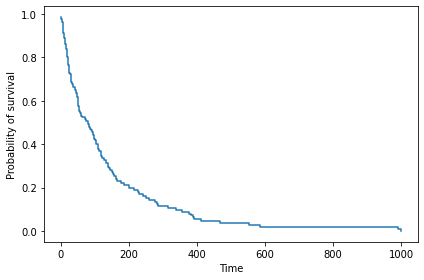

In [10]:
# non parametric cuve
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator( y['Status'], y['Survival_in_days'])
fig, ax = plt.subplots()
ax.step(time, survival_prob, where='post')
ax.set_ylabel('Probability of survival')
ax.set_xlabel('Time')

plt.tight_layout()                                    

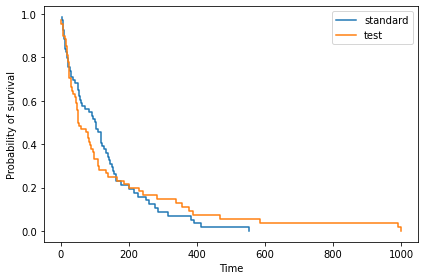

In [12]:
# compare treatment group versus control

for treatment_type in ('standard', 'test'):

    mask_treatment = X['Treatment'] == treatment_type
    
    time, survival_prob = kaplan_meier_estimator(
        y['Status'][mask_treatment],
        y['Survival_in_days'][mask_treatment]
    )

    
    plt.step(time, survival_prob, where='post', label=f'{treatment_type}')
    
plt.ylabel('Probability of survival')
plt.xlabel('Time')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
# determine whether these is a statistical significant difference between survival curves
from sksurv.compare import compare_survival

group_indicator = X.loc[:, 'Treatment']
groups = group_indicator.unique()

chi2, pvalue= compare_survival(y, group_indicator)

print(pvalue)

0.9277272333400758


In [19]:
# add parameters to survival curve
from sksurv.preprocessing import OneHotEncoder

X_num = OneHotEncoder().fit_transform(X)
X_num

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...
132,65.0,1.0,0.0,0.0,75.0,1.0,0.0,1.0
133,64.0,1.0,0.0,0.0,60.0,5.0,0.0,1.0
134,67.0,1.0,0.0,0.0,70.0,18.0,1.0,1.0
135,65.0,1.0,0.0,0.0,80.0,4.0,0.0,1.0


In [20]:
# Cox Proportional Hazard model
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_num, y)

CoxPHSurvivalAnalysis()

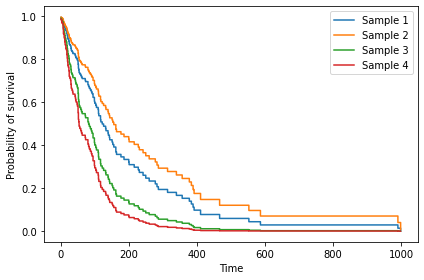

In [25]:
# Create a set of 4 synthetic patients

X_test = pd.DataFrame.from_dict({
    1: [65, 0, 0, 1, 60, 1, 0, 1],
    2: [65, 0, 0, 1, 60, 1, 0, 0],
    3: [65, 0, 1, 0, 60, 1, 0, 0],
    4: [65, 0, 1, 0, 60, 1, 0, 1]},
     columns=X_num.columns, orient='index')

# Estimate the survival functions
pred_surv = estimator.predict_survival_function(X_test)

# Plot the survival function for each new patient
time_points = np.arange(1, 1000)

for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where='post', label=f'Sample {i+1}')
    
plt.ylabel('Probability of survival')
plt.xlabel('Time')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
# look at score
from sksurv.metrics import concordance_index_censored

estimator.score(X_num, y)

0.7362562471603816

In [43]:
# look at c index
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from sklearn.model_selection import train_test_split

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, stratify=y['Status'], random_state=42)


train_y = Surv.from_arrays(
  y_train['Status'],
  y_train["Survival_in_days"]
)

test_y = Surv.from_arrays(
  y_test['Status'],
  y_test["Survival_in_days"]
)

model = CoxnetSurvivalAnalysis()
model.fit(X_train, train_y)

test_risk_scores = model.predict(X_test)
cindex = concordance_index_censored(
  event_indicator=test_y["event"],
  event_time=test_y["time"],
  estimate=test_risk_scores)
cindex

(0.7257617728531855, 261, 98, 2, 1)

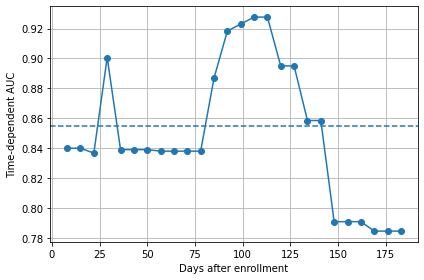

In [44]:
# Time-dependent ROC AUC
# highest performance is between 75 and 125 days. Therefore, our model predicts best in the medium-term

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, stratify=y['Status'], random_state=42)

# Fit the model on the training set
cph = CoxPHSurvivalAnalysis()
cph.fit(X_train, y_train)

# Plot the time-depdendent ROC and calculate AUC
from sksurv.metrics import cumulative_dynamic_auc

time_interval = np.arange(8, 184, 7)

cph_risk_scores = cph.predict(X_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, cph_risk_scores, time_interval)

fig, ax = plt.subplots()

ax.plot(time_interval, cph_auc, marker='o')
ax.axhline(cph_mean_auc, ls='--')
ax.set_xlabel('Days after enrollment')
ax.set_ylabel('Time-dependent AUC')

plt.grid(True)
plt.tight_layout()